In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


OUTPUT_TEMPLATE = (
    "Initial (invalid) T-test p-value: {initial_ttest_p:.3g}\n"
    "Original data normality p-values: {initial_weekday_normality_p:.3g} {initial_weekend_normality_p:.3g}\n"
    "Original data equal-variance p-value: {initial_levene_p:.3g}\n"
    "Transformed data normality p-values: {transformed_weekday_normality_p:.3g} {transformed_weekend_normality_p:.3g}\n"
    "Transformed data equal-variance p-value: {transformed_levene_p:.3g}\n"
    "Weekly data normality p-values: {weekly_weekday_normality_p:.3g} {weekly_weekend_normality_p:.3g}\n"
    "Weekly data equal-variance p-value: {weekly_levene_p:.3g}\n"
    "Weekly T-test p-value: {weekly_ttest_p:.3g}\n"
    "Mann–Whitney U-test p-value: {utest_p:.3g}"
)

In [2]:
# reddit_counts = 'reddit-counts.json.gz'
reddit_counts = sys.argv[1]

counts = pd.read_json(reddit_counts, lines=True)

In [3]:
counts

,comment_count,date,subreddit
0,7,2012-02-20,newfoundland
1,1,2015-01-26,Manitoba
2,2,2013-09-07,Yukon
3,5,2014-02-15,saskatchewan
4,1652,2014-07-06,canada
5,4,2013-06-21,PEI
6,670,2015-03-20,Quebec
7,316,2014-01-08,Quebec
8,19,2015-04-11,newfoundland
9,1,2012-07-04,Yukon


In [4]:
counts = counts[((counts['date'].dt.year == 2012) | (counts['date'].dt.year == 2013))] 
counts = counts[(counts['subreddit'] == 'canada')]

In [5]:
counts = counts.reset_index(drop = True)

In [6]:
counts

,comment_count,date,subreddit
0,1657,2013-03-14,canada
1,1369,2013-07-08,canada
2,1343,2012-07-04,canada
3,1619,2013-03-11,canada
4,1909,2013-09-11,canada
5,1196,2012-02-04,canada
6,2112,2012-08-08,canada
7,1929,2012-08-09,canada
8,2086,2012-01-17,canada
9,1570,2012-11-17,canada


In [7]:
def weekday_return(day):
    return day.isoweekday()

counts['week'] = counts['date'].apply(weekday_return)

In [8]:
counts

,comment_count,date,subreddit,week
0,1657,2013-03-14,canada,4
1,1369,2013-07-08,canada,1
2,1343,2012-07-04,canada,3
3,1619,2013-03-11,canada,1
4,1909,2013-09-11,canada,3
5,1196,2012-02-04,canada,6
6,2112,2012-08-08,canada,3
7,1929,2012-08-09,canada,4
8,2086,2012-01-17,canada,2
9,1570,2012-11-17,canada,6


In [9]:
weekday = counts[(counts['week'] != 6) & (counts['week'] != 7)]

In [10]:
weekend = counts[(counts['week'] == 6) | (counts['week'] == 7)]

In [11]:
weekday = weekday.reset_index(drop = True)

In [12]:
weekend = weekend.reset_index(drop = True)

In [13]:
weekday

,comment_count,date,subreddit,week
0,1657,2013-03-14,canada,4
1,1369,2013-07-08,canada,1
2,1343,2012-07-04,canada,3
3,1619,2013-03-11,canada,1
4,1909,2013-09-11,canada,3
5,2112,2012-08-08,canada,3
6,1929,2012-08-09,canada,4
7,2086,2012-01-17,canada,2
8,2113,2013-08-20,canada,2
9,1500,2012-01-23,canada,1


In [14]:
weekend

,comment_count,date,subreddit,week
0,1196,2012-02-04,canada,6
1,1570,2012-11-17,canada,6
2,908,2013-07-14,canada,7
3,984,2013-06-22,canada,6
4,1199,2012-07-29,canada,7
5,1028,2013-09-21,canada,6
6,1156,2013-01-05,canada,6
7,1752,2013-01-13,canada,7
8,1844,2013-09-08,canada,7
9,1197,2012-05-12,canada,6


In [15]:
p_value = stats.ttest_ind(weekday['comment_count'], weekend['comment_count']).pvalue

In [16]:
p_value

1.3005502847207912e-58

In [17]:
ttest_weekday = stats.normaltest(weekday['comment_count']).pvalue
ttest_weekend = stats.normaltest(weekend['comment_count']).pvalue

In [18]:
ttest_weekday

1.0091137251707994e-07

In [19]:
ttest_weekend

0.0015209196859635404

In [20]:
levene = stats.levene(weekday['comment_count'], weekend['comment_count']).pvalue

In [21]:
levene

0.04378740989202803

## Fix 1: transforming data might save us.

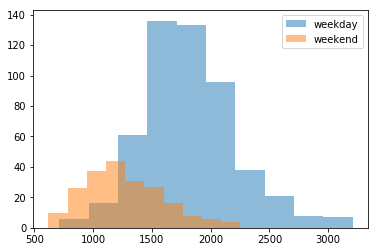

In [22]:
plt.hist(weekday['comment_count'], alpha=0.5)
plt.hist(weekend['comment_count'], alpha=0.5)
plt.legend(['weekday','weekend'])
# plt.show()

In [23]:
# log:
weekday['log'] = weekday['comment_count'].apply(np.log)
weekend['log'] = weekend['comment_count'].apply(np.log)


In [24]:
# exp
# weekday['exp'] = weekday['comment_count'].apply(np.exp)
# weekend['exp'] = weekend['comment_count'].apply(np.exp)

In [25]:
# sqrt
weekday['sqrt'] = weekday['comment_count'].apply(np.sqrt)
weekend['sqrt'] = weekend['comment_count'].apply(np.sqrt)

In [26]:
# counts ** 2
weekday['counts_2'] = (weekday['comment_count']) ** 2
weekend['counts_2'] = (weekend['comment_count']) ** 2

In [27]:
weekday

,comment_count,date,subreddit,week,log,sqrt,counts_2
0,1657,2013-03-14,canada,4,7.412764,40.706265,2745649
1,1369,2013-07-08,canada,1,7.221836,37.000000,1874161
2,1343,2012-07-04,canada,3,7.202661,36.646964,1803649
3,1619,2013-03-11,canada,1,7.389564,40.236799,2621161
4,1909,2013-09-11,canada,3,7.554335,43.692105,3644281
5,2112,2012-08-08,canada,3,7.655391,45.956501,4460544
6,1929,2012-08-09,canada,4,7.564757,43.920383,3721041
7,2086,2012-01-17,canada,2,7.643004,45.672749,4351396
8,2113,2013-08-20,canada,2,7.655864,45.967380,4464769
9,1500,2012-01-23,canada,1,7.313220,38.729833,2250000


In [28]:
weekend

,comment_count,date,subreddit,week,log,sqrt,counts_2
0,1196,2012-02-04,canada,6,7.086738,34.583233,1430416
1,1570,2012-11-17,canada,6,7.358831,39.623226,2464900
2,908,2013-07-14,canada,7,6.811244,30.133038,824464
3,984,2013-06-22,canada,6,6.891626,31.368774,968256
4,1199,2012-07-29,canada,7,7.089243,34.626579,1437601
5,1028,2013-09-21,canada,6,6.935370,32.062439,1056784
6,1156,2013-01-05,canada,6,7.052721,34.000000,1336336
7,1752,2013-01-13,canada,7,7.468513,41.856899,3069504
8,1844,2013-09-08,canada,7,7.519692,42.941821,3400336
9,1197,2012-05-12,canada,6,7.087574,34.597688,1432809


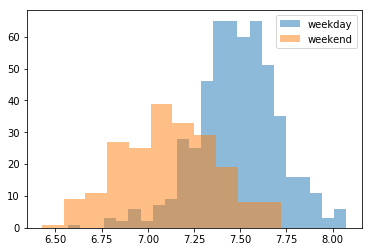

In [29]:
# log
plt.hist(weekday['log'], bins = 'auto', alpha=0.5) 
plt.hist(weekend['log'], bins = 'auto', alpha=0.5) 

log_weekday = stats.normaltest(weekday['log']).pvalue # <0.05
log_weekend = stats.normaltest(weekend['log']).pvalue # > 0.05
levene_log = stats.levene(weekend['log'], weekday['log']).pvalue # < 0.05

plt.legend(['weekday','weekend'])
# plt.show()

In [30]:
# exp
# plt.hist(weekday['exp'], bins = 'auto', alpha=0.5)
# plt.hist(weekend['exp'], bins = 'auto', alpha=0.5)

# exp_weekday = stats.normaltest(weekday['exp']).pvalue
# exp_weekend = stats.normaltest(weekend['exp']).pvalue
# levene_exp = stats.levene(weekend['exp'], weekday['exp']).pvalue

# plt.legend(['weekday','weekend'])
# plt.show()

# right_skewed, do not need to try the np.exp and the values of it are Inf

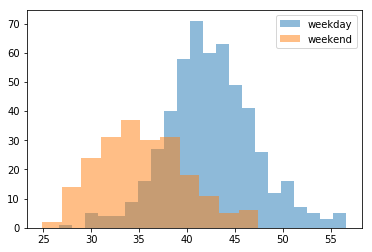

In [31]:
# sqrt
plt.hist(weekday['sqrt'], bins = 'auto', alpha=0.5)
plt.hist(weekend['sqrt'], bins = 'auto', alpha=0.5)

sqrt_weekday = stats.normaltest(weekday['sqrt']).pvalue # < 0.05
sqrt_weekend = stats.normaltest(weekend['sqrt']).pvalue # > 0.05
levene_sqrt = stats.levene(weekend['sqrt'], weekday['sqrt']).pvalue # > 0.05

plt.legend(['weekday','weekend'])
# plt.show()

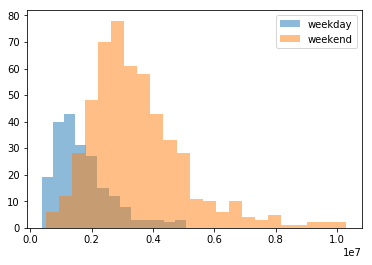

In [32]:
# counnts ** 2
plt.hist(weekend['counts_2'], bins = 'auto', alpha=0.5) 
plt.hist(weekday['counts_2'], bins = 'auto', alpha=0.5)

counts_2_weekday = stats.normaltest(weekday['counts_2']).pvalue # < 0.05
counts_2_weekend = stats.normaltest(weekend['counts_2']).pvalue # < 0.05
levene_counts_2 = stats.levene(weekend['counts_2'], weekday['counts_2']).pvalue # < 0.05

plt.legend(['weekday','weekend'])
# plt.show()

In [33]:
# np.sqrt makes the counts closest to normal distributions.

In [34]:
p_value_weekday_nd = stats.normaltest(weekday['sqrt']).pvalue
p_value_weekend_nd = stats.normaltest(weekend['sqrt']).pvalue

In [35]:
levene_nd = stats.levene(weekday['sqrt'], weekend['sqrt']).pvalue

In [36]:
p_value_weekday_nd

0.03687221613365365

In [37]:
p_value_weekend_nd

0.10760562894666933

In [38]:
levene_nd

0.5560544297516696

## Fix 2: the Central Limit Theorem might save us.

In [39]:
def isoca_return(day):
    return day.isocalendar()

weekday['isoca_return'] = weekday['date'].apply(isoca_return)
weekend['isoca_return'] = weekend['date'].apply(isoca_return)

In [40]:
weekday

,comment_count,date,subreddit,week,log,sqrt,counts_2,isoca_return
0,1657,2013-03-14,canada,4,7.412764,40.706265,2745649,"(2013, 11, 4)"
1,1369,2013-07-08,canada,1,7.221836,37.000000,1874161,"(2013, 28, 1)"
2,1343,2012-07-04,canada,3,7.202661,36.646964,1803649,"(2012, 27, 3)"
3,1619,2013-03-11,canada,1,7.389564,40.236799,2621161,"(2013, 11, 1)"
4,1909,2013-09-11,canada,3,7.554335,43.692105,3644281,"(2013, 37, 3)"
5,2112,2012-08-08,canada,3,7.655391,45.956501,4460544,"(2012, 32, 3)"
6,1929,2012-08-09,canada,4,7.564757,43.920383,3721041,"(2012, 32, 4)"
7,2086,2012-01-17,canada,2,7.643004,45.672749,4351396,"(2012, 3, 2)"
8,2113,2013-08-20,canada,2,7.655864,45.967380,4464769,"(2013, 34, 2)"
9,1500,2012-01-23,canada,1,7.313220,38.729833,2250000,"(2012, 4, 1)"


In [41]:
weekend

,comment_count,date,subreddit,week,log,sqrt,counts_2,isoca_return
0,1196,2012-02-04,canada,6,7.086738,34.583233,1430416,"(2012, 5, 6)"
1,1570,2012-11-17,canada,6,7.358831,39.623226,2464900,"(2012, 46, 6)"
2,908,2013-07-14,canada,7,6.811244,30.133038,824464,"(2013, 28, 7)"
3,984,2013-06-22,canada,6,6.891626,31.368774,968256,"(2013, 25, 6)"
4,1199,2012-07-29,canada,7,7.089243,34.626579,1437601,"(2012, 30, 7)"
5,1028,2013-09-21,canada,6,6.935370,32.062439,1056784,"(2013, 38, 6)"
6,1156,2013-01-05,canada,6,7.052721,34.000000,1336336,"(2013, 1, 6)"
7,1752,2013-01-13,canada,7,7.468513,41.856899,3069504,"(2013, 2, 7)"
8,1844,2013-09-08,canada,7,7.519692,42.941821,3400336,"(2013, 36, 7)"
9,1197,2012-05-12,canada,6,7.087574,34.597688,1432809,"(2012, 19, 6)"


In [42]:
weekday = weekday.join(weekday['isoca_return'].apply(pd.Series))
weekend = weekend.join(weekend['isoca_return'].apply(pd.Series))

In [43]:
weekday

,comment_count,date,subreddit,week,log,sqrt,counts_2,isoca_return,0,1,2
0,1657,2013-03-14,canada,4,7.412764,40.706265,2745649,"(2013, 11, 4)",2013,11,4
1,1369,2013-07-08,canada,1,7.221836,37.000000,1874161,"(2013, 28, 1)",2013,28,1
2,1343,2012-07-04,canada,3,7.202661,36.646964,1803649,"(2012, 27, 3)",2012,27,3
3,1619,2013-03-11,canada,1,7.389564,40.236799,2621161,"(2013, 11, 1)",2013,11,1
4,1909,2013-09-11,canada,3,7.554335,43.692105,3644281,"(2013, 37, 3)",2013,37,3
5,2112,2012-08-08,canada,3,7.655391,45.956501,4460544,"(2012, 32, 3)",2012,32,3
6,1929,2012-08-09,canada,4,7.564757,43.920383,3721041,"(2012, 32, 4)",2012,32,4
7,2086,2012-01-17,canada,2,7.643004,45.672749,4351396,"(2012, 3, 2)",2012,3,2
8,2113,2013-08-20,canada,2,7.655864,45.967380,4464769,"(2013, 34, 2)",2013,34,2
9,1500,2012-01-23,canada,1,7.313220,38.729833,2250000,"(2012, 4, 1)",2012,4,1


In [44]:
# we can not use weekday['0'], weekday['1'], weekday['2'], weekend['0'], weekend['1'], weekend['2']

weekday = weekday.rename(columns = {0:'year_isoca', 1:'week_isoca', 2:'day_isoca'})
weekend = weekend.rename(columns = {0:'year_isoca', 1:'week_isoca', 2:'day_isoca'})

In [45]:
weekday

,comment_count,date,subreddit,week,log,sqrt,counts_2,isoca_return,year_isoca,week_isoca,day_isoca
0,1657,2013-03-14,canada,4,7.412764,40.706265,2745649,"(2013, 11, 4)",2013,11,4
1,1369,2013-07-08,canada,1,7.221836,37.000000,1874161,"(2013, 28, 1)",2013,28,1
2,1343,2012-07-04,canada,3,7.202661,36.646964,1803649,"(2012, 27, 3)",2012,27,3
3,1619,2013-03-11,canada,1,7.389564,40.236799,2621161,"(2013, 11, 1)",2013,11,1
4,1909,2013-09-11,canada,3,7.554335,43.692105,3644281,"(2013, 37, 3)",2013,37,3
5,2112,2012-08-08,canada,3,7.655391,45.956501,4460544,"(2012, 32, 3)",2012,32,3
6,1929,2012-08-09,canada,4,7.564757,43.920383,3721041,"(2012, 32, 4)",2012,32,4
7,2086,2012-01-17,canada,2,7.643004,45.672749,4351396,"(2012, 3, 2)",2012,3,2
8,2113,2013-08-20,canada,2,7.655864,45.967380,4464769,"(2013, 34, 2)",2013,34,2
9,1500,2012-01-23,canada,1,7.313220,38.729833,2250000,"(2012, 4, 1)",2012,4,1


In [46]:
weekend

,comment_count,date,subreddit,week,log,sqrt,counts_2,isoca_return,year_isoca,week_isoca,day_isoca
0,1196,2012-02-04,canada,6,7.086738,34.583233,1430416,"(2012, 5, 6)",2012,5,6
1,1570,2012-11-17,canada,6,7.358831,39.623226,2464900,"(2012, 46, 6)",2012,46,6
2,908,2013-07-14,canada,7,6.811244,30.133038,824464,"(2013, 28, 7)",2013,28,7
3,984,2013-06-22,canada,6,6.891626,31.368774,968256,"(2013, 25, 6)",2013,25,6
4,1199,2012-07-29,canada,7,7.089243,34.626579,1437601,"(2012, 30, 7)",2012,30,7
5,1028,2013-09-21,canada,6,6.935370,32.062439,1056784,"(2013, 38, 6)",2013,38,6
6,1156,2013-01-05,canada,6,7.052721,34.000000,1336336,"(2013, 1, 6)",2013,1,6
7,1752,2013-01-13,canada,7,7.468513,41.856899,3069504,"(2013, 2, 7)",2013,2,7
8,1844,2013-09-08,canada,7,7.519692,42.941821,3400336,"(2013, 36, 7)",2013,36,7
9,1197,2012-05-12,canada,6,7.087574,34.597688,1432809,"(2012, 19, 6)",2012,19,6


In [47]:
weekday_mean = weekday.groupby(['year_isoca','week_isoca']).mean()
weekend_mean = weekend.groupby(['year_isoca','week_isoca']).mean()

In [48]:
weekday_mean

comment_count  week       log       sqrt   counts_2  \
year_isoca week_isoca                                                        
2012       1                  1561.6   3.0  7.340543  39.393933  2493845.6   
           2                  2062.8   3.0  7.602948  45.097687  4483684.8   
           3                  1555.0   3.0  7.288273  38.885826  2636315.0   
           4                  1662.0   3.0  7.406189  40.668995  2817662.8   
           5                  1795.6   3.0  7.483867  42.277538  3282223.6   
           6                  1453.4   3.0  7.263587  37.956851  2180543.4   
           7                  1909.0   3.0  7.545385  43.593778  3711365.4   
           8                  1542.8   3.0  7.318831  39.054709  2495043.2   
           9                  1963.2   3.0  7.581003  44.293274  3864471.6   
           10                 1956.0   3.0  7.577652  44.215531  3833759.2   
           11                 2001.0   3.0  7.599293  44.708925  4020992.2   
           12                 2225.4   3.0  7.682229  46.876456  5202874.2   
           13                 2061.8   3.0  7.592797  44.959170  4624044.6   
           14                 2371.0   3.0  7.734310  48.257805  6001852.2   
           15                 1783.6   3.0  7.484058  42.208022  3196215.2   
           16                 2129.8   3.0  7.659040  46.094670  4580465.0   
           17                 2095.2   3.0  7.637103  45.656741  4477223.6   
           18                 1689.4   3.0  7.424860  41.029378  2892078.2   
           19                 1938.4   3.0  7.564234  43.968349  3797123.6   
           20                 1808.2   3.0  7.492908  42.446643  3316738.2   
           21                 2318.8   3.0  7.737201  48.013437  5505262.0   
           22                 2008.0   3.0  7.602542  44.784642  4050265.2   
           23                 1863.6   3.0  7.508930  42.940809  3620551.2   
           24                 1909.0   3.0  7.543978  43.578824  3720647.8   
           25                 1923.2   3.0  7.555297  43.785692  3741275.6   
           26                 1798.4   3.0  7.482340  42.277123  3314628.4   
           27                 1474.8   3.0  7.280218  38.248864  2245844.4   
           28                 1823.6   3.0  7.496375  42.575295  3402904.4   
           29                 1985.4   3.0  7.576455  44.364012  4088381.4   
           30                 2003.8   3.0  7.593914  44.667201  4079389.8   
...                              ...   ...       ...        ...        ...   
2013       24                 1743.4   3.0  7.452455  41.639254  3104203.8   
           25                 1446.4   3.0  7.252871  37.812801  2179418.8   
           26                 1692.4   3.0  7.424554  41.045009  2913152.8   
           27                 1313.2   3.0  7.159266  36.049997  1795895.6   
           28                 1820.2   3.0  7.468747  42.264814  3557162.6   
           29                 1605.2   3.0  7.366583  39.920322  2652007.6   
           30                 1947.2   3.0  7.566957  44.048807  3843676.4   
           31                 2091.2   3.0  7.623775  45.483138  4560490.8   
           32                 1538.0   3.0  7.314469  38.989401  2470226.4   
           33                 1623.6   3.0  7.378386  40.154787  2706678.8   
           34                 2104.2   3.0  7.646246  45.808678  4477545.4   
           35                 2210.0   3.0  7.690663  46.893071  4980665.2   
           36                 1518.0   3.0  7.307957  38.795638  2381528.4   
           37                 1978.8   3.0  7.549519  44.015696  4292178.0   
           38                 1531.2   3.0  7.328451  39.077461  2371190.4   
           39                 1548.0   3.0  7.343264  39.330313  2403297.2   
           40                 1562.8   3.0  7.345874  39.449953  2482830.0   
           41                 1388.4   3.0  7.221669  37.131522  1978466.8   
           42                 1855.8   3.0  7

In [49]:
weekend_mean

comment_count  week       log       sqrt   counts_2  \
year_isoca week_isoca                                                        
2011       52                  995.0   7.0  6.902743  31.543621   990025.0   
2012       1                  1163.0   6.5  7.043596  33.974248  1392970.0   
           2                  1372.0   6.5  7.220438  37.007347  1895840.0   
           3                   915.5   6.5  6.819195  30.255144   838602.5   
           4                  1285.0   6.5  7.151186  35.781402  1675250.0   
           5                  1228.0   6.5  7.112802  35.039856  1509008.0   
           6                   980.5   6.5  6.884246  31.283103   968690.5   
           7                  1273.5   6.5  7.148993  35.681393  1623524.5   
           8                  1336.5   6.5  7.197692  36.557098  1786652.5   
           9                  1021.0   6.5  6.928046  31.949166  1043465.0   
           10                 1353.0   6.5  7.185727  36.561239  1917634.0   
           11                 1282.0   6.5  7.135341  35.619972  1710605.0   
           12                 1759.0   6.5  7.466445  41.877081  3131330.0   
           13                 1481.0   6.5  7.299732  38.476634  2196610.0   
           14                 1368.5   6.5  7.221115  36.989952  1874124.5   
           15                 1423.5   6.5  7.260713  37.727785  2027002.5   
           16                 1586.0   6.5  7.362269  39.758062  2548885.0   
           17                 1623.5   6.5  7.391598  40.285211  2639658.5   
           18                 1051.5   6.5  6.954089  32.395397  1114208.5   
           19                 1275.5   6.5  7.149196  35.697213  1633062.5   
           20                 1196.5   6.5  7.085701  34.577885  1435772.5   
           21                 1311.0   6.5  7.165674  36.091781  1762402.0   
           22                 1728.5   6.5  7.454003  41.564779  2993718.5   
           23                 1725.0   6.5  7.452810  41.531333  2976649.0   
           24                 1109.0   6.5  7.010980  33.299702  1230457.0   
           25                 1222.0   6.5  7.108136  34.956168  1493608.0   
           26                 1173.0   6.5  7.066138  34.238971  1379178.0   
           27                  982.0   6.5  6.871919  31.199342   997813.0   
           28                 1272.0   6.5  7.146998  35.653097  1622340.0   
           29                 1761.5   6.5  7.473142  41.962057  3107712.5   
...                              ...   ...       ...        ...        ...   
2013       23                  933.0   6.5  6.836665  30.531766   873514.0   
           24                  882.0   6.5  6.761162  29.543571   809965.0   
           25                  895.0   6.5  6.791855  29.879457   808946.0   
           26                  844.0   6.5  6.732434  29.010237   720436.0   
           27                  965.0   6.5  6.869337  31.042795   936409.0   
           28                 1018.5   6.5  6.920166  31.866817  1049552.5   
           29                  761.0   6.5  6.634176  27.583078   579650.0   
           30                 1071.5   6.5  6.976814  32.733767  1148114.5   
           31                 1403.0   6.5  7.246356  37.456525  1968458.0   
           32                 1759.5   6.5  7.431645  41.521574  3340370.5   
           33                 1335.0   6.5  7.196669  36.537488  1782289.0   
           34                 1229.0   6.5  7.086716  34.820779  1590530.0   
           35                 1349.0   6.5  7.183294  36.511913  1904482.0   
           36                 1508.0   6.5  7.293080  38.588153  2386960.0   
           37                 1286.0   6.5  7.127539  35.579537  1755557.0   
           38                 1055.5   6.5  6.961430  32.485702  1114836.5   
           39                 1238.5   6.5  7.121646  35.192242  1533912.5   
           40                 1096.5   6.5  6.998817  33.104656  1204862.5   
           41                 1108.0   6.5  7

In [50]:
p_value_weekday_isoca = stats.normaltest(weekday_mean['comment_count']).pvalue
p_value_weekend_isoca = stats.normaltest(weekend_mean['comment_count']).pvalue
levene_isoca = stats.levene(weekday_mean['comment_count'], weekend_mean['comment_count']).pvalue

In [51]:
ttest_isoca = stats.ttest_ind(weekday_mean['comment_count'],weekend_mean['comment_count']).pvalue

In [52]:
p_value_weekday_isoca

0.3082637390825463

In [53]:
p_value_weekend_isoca

0.15294924717078442

In [54]:
levene_isoca

0.20383788083573426

In [55]:
ttest_isoca

1.3353656052303144e-34

## Fix 3: a non-parametric test might save us.

In [56]:
utest_p_value = stats.mannwhitneyu(weekday['comment_count'],weekend['comment_count']).pvalue

In [57]:
utest_p_value

4.3122266173669665e-53

## Output

In [58]:
def main():
    
    print(OUTPUT_TEMPLATE.format(
        initial_ttest_p=p_value,
        initial_weekday_normality_p=ttest_weekday,
        initial_weekend_normality_p=ttest_weekend,
        initial_levene_p=levene,
        transformed_weekday_normality_p=p_value_weekday_nd,
        transformed_weekend_normality_p=p_value_weekend_nd,
        transformed_levene_p=levene_nd,
        weekly_weekday_normality_p=p_value_weekday_isoca,
        weekly_weekend_normality_p=p_value_weekend_isoca,
        weekly_levene_p=levene_isoca,
        weekly_ttest_p=ttest_isoca,
        utest_p=utest_p_value,
    ))

In [59]:
if __name__ == '__main__':
    main()

Initial (invalid) T-test p-value: 1.3e-58
Original data normality p-values: 1.01e-07 0.00152
Original data equal-variance p-value: 0.0438
Transformed data normality p-values: 0.0369 0.108
Transformed data equal-variance p-value: 0.556
Weekly data normality p-values: 0.308 0.153
Weekly data equal-variance p-value: 0.204
Weekly T-test p-value: 1.34e-34
Mann–Whitney U-test p-value: 4.31e-53
